In [1]:
import matplotlib.pyplot as plt
import datetime
import os
import json
from sklearn.metrics import (
    roc_auc_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    classification_report,
)
import numpy as np
from main_pygod import get_data_from_loader, load_dataset, make_loader, create_model, train_model, test_model
import warnings

In [2]:
def create_metrics():
    return {"overall": {"roc_auc": [], "accuracy": [],"f1": [], "precision": [], "recall": []},
            "licit": {"precision": [], "recall": [],"f1-score": []}, 
           "illicit":{"precision": [], "recall": [],"f1-score": []}}

def hyperparameter_loop(group_para, parameter, parameter_list, metrics):
    """
    Run a grid search for a hyperparameter
    Args: hyperparameter, hyperparameter list, classification metrics (empty dict)
    Returns: Classification metrics dictionary
    """ 
    warnings.filterwarnings('ignore')
    for i in range(len(parameter_list)):
        config[group_para][parameter] = parameter_list[i]
        dataset, input_nodes = load_dataset(mask="train",use_aggregated=config["data"]["use_aggregated"],use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes)
        train_data = get_data_from_loader(loader)

        mymodel = create_model(config=config["model"])

        trained_model = train_model(mymodel, train_data)
    
        dataset, input_nodes = load_dataset(mask="test",use_aggregated=config["data"]["use_aggregated"],
        use_temporal=config["data"]["use_temporal"])
        loader = make_loader(data=dataset, loader_type='neighbor', batch_size=config["data"]["batch_size"], input_nodes=input_nodes,)    
        test_data = get_data_from_loader(loader)

        test_metrics = test_model(model=trained_model, data=test_data, output_directory=config["training"]["save_dir"])

        for key in list(test_metrics.keys())[0:-1]:
            metrics["overall"][key].append(test_metrics[key])
        output = test_metrics["classification_report"]
        for key in list(output["0"].keys())[0:-1]:
            metrics["licit"][key].append(output["0"][key])
            metrics["illicit"][key].append(output["1"][key])
        
    return metrics

def plot_metrics(metrics, para_list, parameter, x_log = False):
    """
    Plot the classification metrics
    Args:classification metrics
    Returns:None
    """ 

    size = (8,3)
    plt.figure(figsize= size)
    for key in list(metrics["overall"]):
        plt.plot(para_list, metrics["overall"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Total Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Overall Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["licit"]):
        plt.plot(para_list, metrics["licit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Licit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Licit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

    plt.figure(figsize= size)
    for key in list(metrics["illicit"]):
        plt.plot(para_list, metrics["illicit"][key], label= key)
    plt.xlabel(parameter)
    plt.ylabel("Illicit Metrics")
    if x_log:  plt.xscale("log")
    plt.title("Illicit Classification Metrics")
    plt.legend(loc=(1.04, 0))
    plt.tight_layout()
    plt.show()

## DOMINANT using GAT backbone

In [3]:
config = {
        "model": {
            "hid_dim": 128,
            "num_layers": 4,
            "dropout": 0.2,
            "weight_decay": 0.0,
            "contamination": 0.1,
            "backbone": "gat",
            "lr": 0.005,
            "epoch": 10,
            "batch_size": 2048,
            "num_neigh": 10,
            "weight": 0.5,
            "verbose": 1,
        },
        "data": {
            "use_aggregated": True,
            "use_temporal": False,
            "batch_size": 2048*4
        },
        "training": {
            "save_embeddings": False,
            "save_dir": "./saved_models",
        },
        "classifiers": ["rf", "mlp"],
    }

#### Number of layers

In [4]:
metrics = create_metrics()
para_change = "num_layers"
para_list = [2, 3, 4, 5, 6,7]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[15727, 165], edge_index=[2, 15714], y=[15727])
creating model with {'hid_dim': 128, 'num_layers': 2, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x7f31f3b9add0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 532.1340 | 
Epoch 0001: Loss 500.4385 | 
Epoch 0002: Loss 187.5545 | 
Epoch 0003: Loss 59.9933 | 
Epoch 0004: Loss 34.5146 | 
Epoch 0005: Loss 14.6723 | 
Epoch 0006: Loss 11.6565 | 
Epoch 0007: Loss 8.2224 | 
Epoch 0008: Loss 8.4680 | 
Epoch 0009: Loss 7.6018 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[13225, 165], edge_index=[2, 12116], y=[13225])
testing model...
Test: Loss 0.4629 | 
ROC AUC: 0.1497
Classification Report:
               precisi

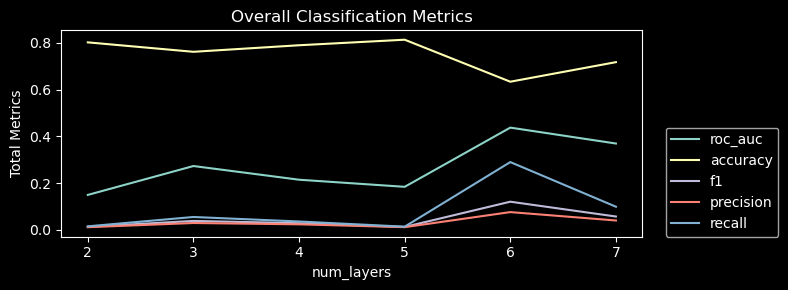

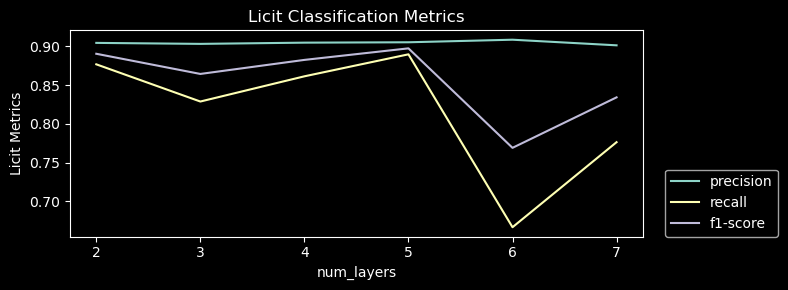

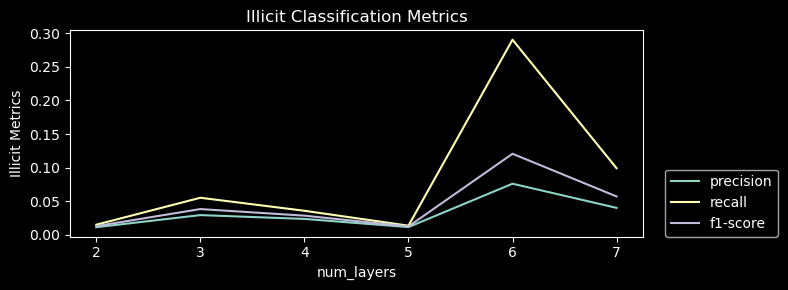

In [5]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Hidden Dimension

In [6]:
metrics = create_metrics()
para_change = "hid_dim"
para_list = [64, 128, 256]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[15698, 165], edge_index=[2, 15713], y=[15698])
creating model with {'hid_dim': 64, 'num_layers': 7, 'dropout': 0.2, 'weight_decay': 0.0, 'act': <function relu at 0x7f31f3b9add0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 201.3200 | 
Epoch 0001: Loss 44.1794 | 
Epoch 0002: Loss 24.0541 | 
Epoch 0003: Loss 16.6292 | 
Epoch 0004: Loss 12.8559 | 
Epoch 0005: Loss 11.0305 | 
Epoch 0006: Loss 10.1205 | 
Epoch 0007: Loss 9.3465 | 
Epoch 0008: Loss 8.9716 | 
Epoch 0009: Loss 8.4378 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[13222, 165], edge_index=[2, 12107], y=[13222])
testing model...
Test: Loss 0.5365 | 
ROC AUC: 0.1980
Classification Report:
               precision 

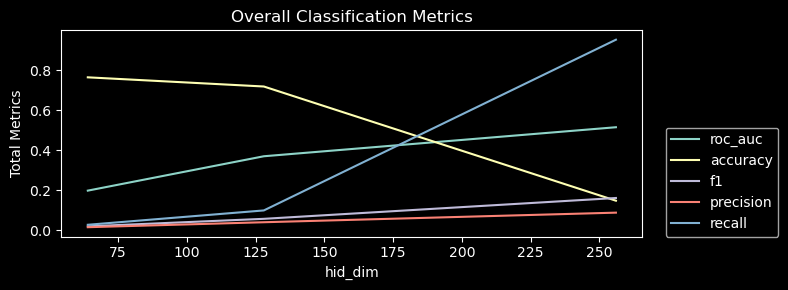

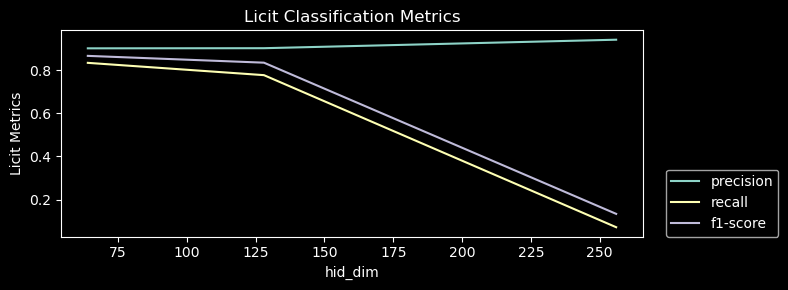

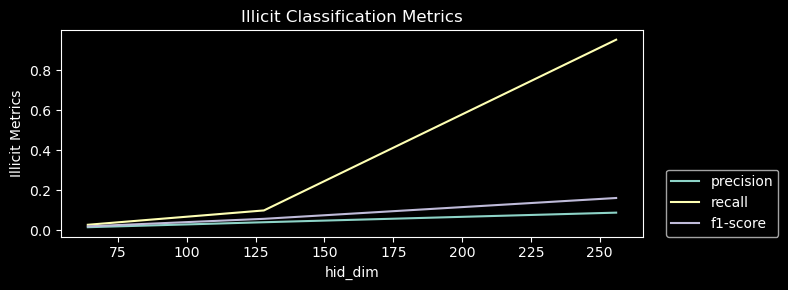

In [7]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Dropout

In [8]:
metrics = create_metrics()
para_change = "dropout"
para_list = [0.0, 0.1, 0.2, 0.3]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[15698, 165], edge_index=[2, 15713], y=[15698])
creating model with {'hid_dim': 256, 'num_layers': 7, 'dropout': 0.0, 'weight_decay': 0.0, 'act': <function relu at 0x7f31f3b9add0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 10, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 13469.7279 | 
Epoch 0001: Loss 5369.4127 | 
Epoch 0002: Loss 570.3605 | 
Epoch 0003: Loss 224.2379 | 
Epoch 0004: Loss 143.6905 | 
Epoch 0005: Loss 150.3515 | 
Epoch 0006: Loss 85.6111 | 
Epoch 0007: Loss 26.4632 | 
Epoch 0008: Loss 17.1593 | 
Epoch 0009: Loss 17.4120 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[13219, 165], edge_index=[2, 12095], y=[13219])
testing model...
Test: Loss 1.1365 | 
ROC AUC: 0.4561
Classification Report:
             

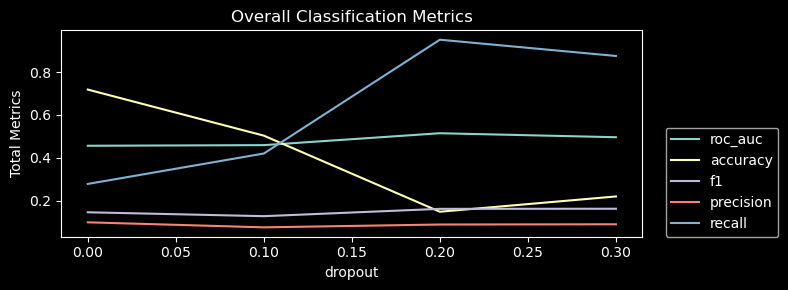

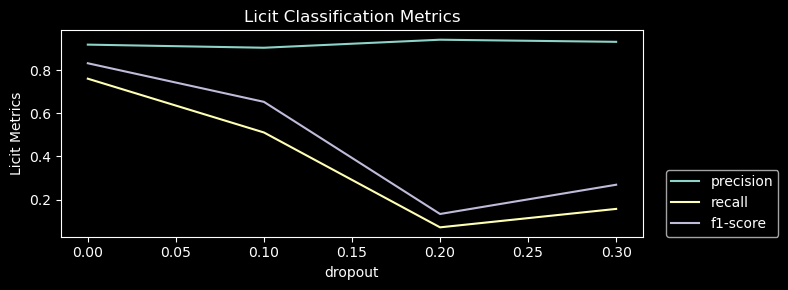

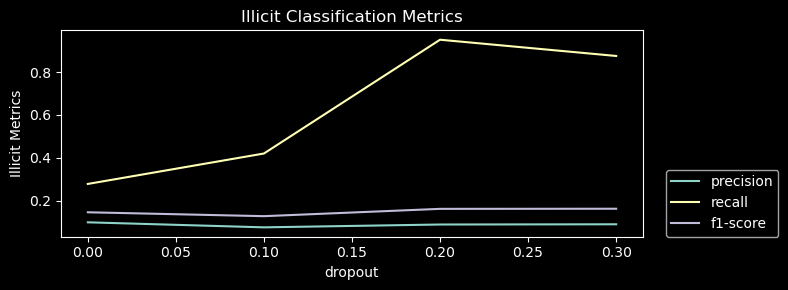

In [9]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Number of neighbors

In [10]:
metrics = create_metrics()
para_change = "num_neigh"
para_list = [5,10,15,20]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[15698, 165], edge_index=[2, 15713], y=[15698])
creating model with {'hid_dim': 256, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x7f31f3b9add0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 5, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 10880.9786 | 
Epoch 0001: Loss 5902.1570 | 
Epoch 0002: Loss 1347.2664 | 
Epoch 0003: Loss 409.0578 | 
Epoch 0004: Loss 186.1964 | 
Epoch 0005: Loss 104.6068 | 
Epoch 0006: Loss 66.2613 | 
Epoch 0007: Loss 46.7572 | 
Epoch 0008: Loss 47.2823 | 
Epoch 0009: Loss 40.8757 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[13168, 165], edge_index=[2, 12093], y=[13168])
testing model...
Test: Loss 1.3509 | 
ROC AUC: 0.4999
Classification Report:
             

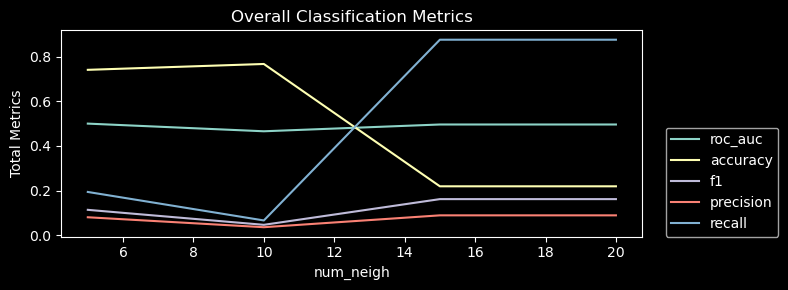

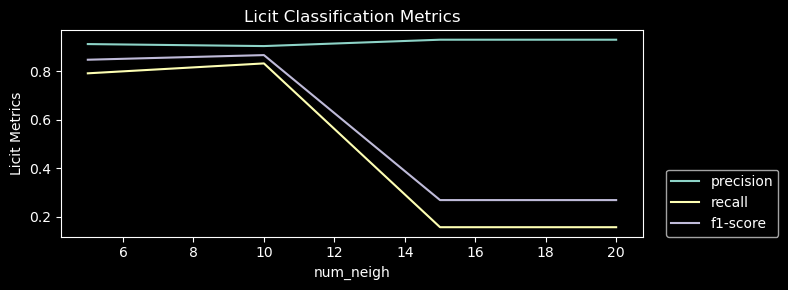

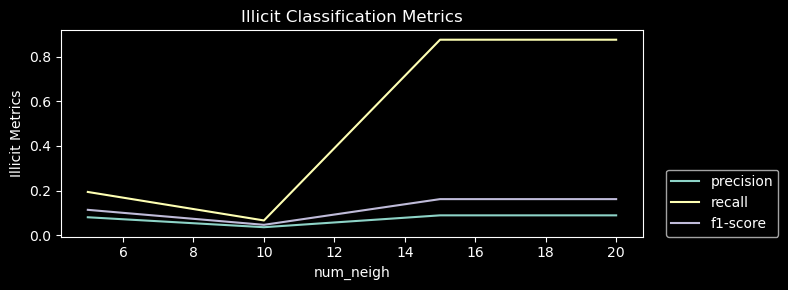

In [11]:
plot_metrics(metrics, para_list, para_change, x_log=False)

#### Epochs

In [12]:
metrics = create_metrics()
para_change = "epoch"
para_list = [10, 20 , 30 ]

metrics = hyperparameter_loop("model", para_change, para_list, metrics)

data loaded from loader:
Data(x=[15698, 165], edge_index=[2, 15713], y=[15698])
creating model with {'hid_dim': 256, 'num_layers': 7, 'dropout': 0.3, 'weight_decay': 0.0, 'act': <function relu at 0x7f31f3b9add0>, 'sigmoid_s': False, 'contamination': 0.1, 'lr': 0.005, 'epoch': 10, 'gpu': -1, 'batch_size': 2048, 'num_neigh': 20, 'weight': 0.5, 'verbose': 1, 'backbone': <class 'src.backbone.GATBackbone'>}
training model...
Epoch 0000: Loss 9516.6880 | 
Epoch 0001: Loss 2378.3186 | 
Epoch 0002: Loss 1258.4686 | 
Epoch 0003: Loss 757.7964 | 
Epoch 0004: Loss 209.3973 | 
Epoch 0005: Loss 186.9408 | 
Epoch 0006: Loss 101.1545 | 
Epoch 0007: Loss 76.9173 | 
Epoch 0008: Loss 92.6326 | 
Epoch 0009: Loss 48.9563 | 
model training complete!
embeddings saved to ./outputs/embeddings_None.npy
labels saved to ./outputs/labels_None.npy
data loaded from loader:
Data(x=[13175, 165], edge_index=[2, 12095], y=[13175])
testing model...
Test: Loss 11.1808 | 
ROC AUC: 0.4960
Classification Report:
           

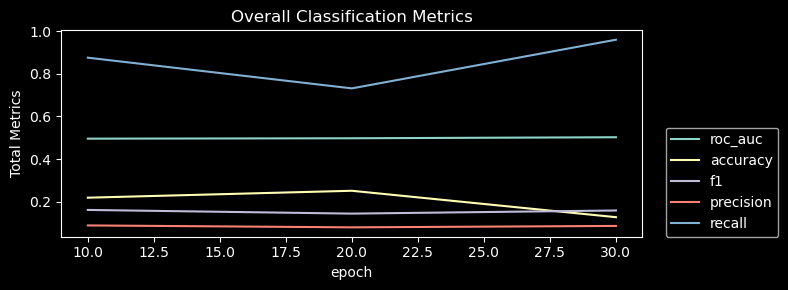

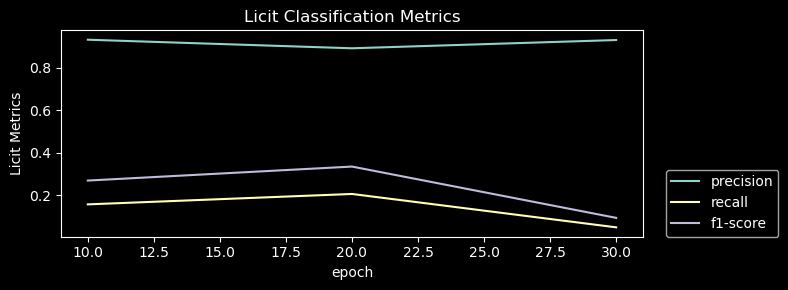

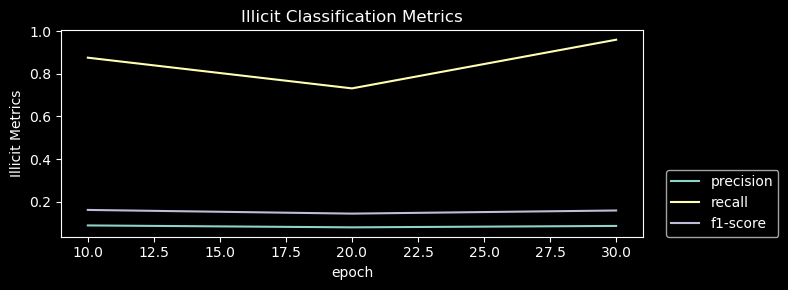

In [13]:
plot_metrics(metrics, para_list, para_change, x_log=False)